In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sklearn
import os

## Figure 3b (degradation)

- Suggestion from reviewer: plot number of peptides per protein as a function of protein length
- Plot the number of fragments (shorter) per known peptide as a function of peptide length
- For our data: plot percentage of abundance of all fragments (length x or shorter) originating from the REAL peptide (the longest one) as a function of peptide length (try also with protein length). 


In [2]:
df = pd.read_pickle('mouse_features_paper_with_peptideranker.pickle')
df_ileum = df.loc['Mouse Ileum']
df_ileum['Annotations', 'Length'] = df_ileum['Annotations', 'Sequence'].str.len()

<ipython-input-2-8c2bdd154b05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ileum['Annotations', 'Length'] = df_ileum['Annotations', 'Sequence'].str.len()


In [3]:
df_ileum.reset_index()['protein_id'].drop_duplicates().to_csv('proteins.txt.tmp', index=False)
# copy this into uniprot and retrive
df_proteins = pd.read_csv('https://www.uniprot.org/uniprot/?query=yourlist:M2022031892C7BAECDB1C5C413EE0E0348724B682468C344&sort=yourlist:M2022031892C7BAECDB1C5C413EE0E0348724B682468C344&columns=yourlist(M2022031892C7BAECDB1C5C413EE0E0348724B682468C344),id,entry%20name,reviewed,protein%20names,genes,organism,length,feature(MODIFIED%20RESIDUE),feature(PEPTIDE),lineage(CLASS),comment(POST-TRANSLATIONAL%20MODIFICATION),sequence,comment(SUBCELLULAR%20LOCATION)&format=tab#', sep='\t')
df_proteins = df_proteins.set_index('Entry')

In [4]:
peptide_counts = df_ileum.groupby('protein_id').size()
peptide_counts.name = 'count'
df_proteins = df_proteins.join(peptide_counts)

df_proteins = df_proteins.loc[~df_proteins['Length'].isna()]
df_proteins = df_proteins.loc[~df_proteins['count'].isna()]

(0.0, 10000.0)

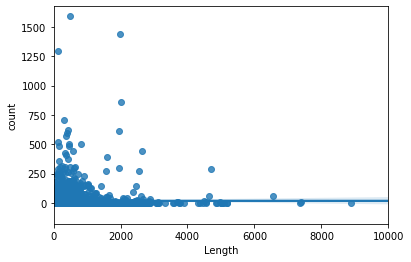

In [5]:
sns.regplot(data=df_proteins, x='Length', y='count')
plt.xlim(0, 10000)
#spearmanr(df_proteins['Length'], df_proteins['count'])

In [6]:
# Ulriks alternative
# •	Plot the number of fragments (shorter) per known peptide as a function of peptide length
# •	For our data: plot percentage of abundance of all fragments (length x or shorter) originating from the REAL peptide (the longest one) as a function of peptide length (try also with protein length). 
 
for idx, row in df_ileum.loc[df_ileum['Annotations', 'Known']].iterrows():
    protein_id, start_pre, stop_pre = idx

    fragment_count = 0
    for sub_idx, sub_row in df_ileum.loc[protein_id].iterrows():
        start, stop = sub_idx

        # require: complete overlap.
        if start>= start_pre and stop <= stop_pre:
            fragment_count +=1

    df_ileum.loc[idx, ('Annotations', 'Fragment count')] = fragment_count
        

/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/IPython/core/interactiveshell.py:2914: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

<AxesSubplot:xlabel="('Annotations', 'Length')", ylabel="('Annotations', 'Fragment count')">

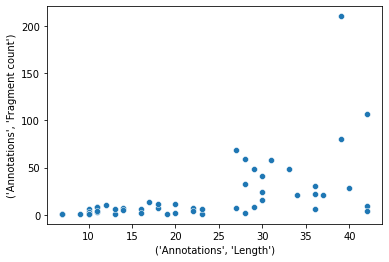

In [7]:
sns.scatterplot(x = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Length'], y = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Fragment count'])

In [8]:
df = pd.read_pickle('../../fegt/paper/mouse_features_paper.pickle')
df = df.loc[df['Annotations', 'Known']]
known_peptides = set(df['Annotations','Sequence'])

In [10]:
larraufie_gastrointestinal = '../datasets/larraufie_gastrointestinal.tsv'
larraufie_enteroendocrine = '../datasets/larraufie_enteroendocrine.tsv'
galvin_enteroendocrine = '../datasets/galvin_enteroendocrine.tsv'


df = pd.read_csv(larraufie_gastrointestinal, sep='\t')
df = df.set_index(['accession', 'start', 'end'])
df['Length'] = df['pepseq'].str.len()

df['Known'] = False
for idx, row in df.iterrows():
    if row['pepseq'] in known_peptides:
        df.loc[idx, 'Known'] = True



for idx, row in df.loc[df['Known']].iterrows():
    protein_id, start_pre, stop_pre = idx

    fragment_count = 0
    for sub_idx, sub_row in df.loc[protein_id].iterrows():
        start, stop = sub_idx

        # require: complete overlap.
        if start>= start_pre and stop <= stop_pre:
            fragment_count +=1

    df.loc[idx, 'Fragment count'] = fragment_count


df_larraufie_gastrointestinal = df


df = pd.read_csv(larraufie_enteroendocrine, sep='\t')
df = df.set_index(['accession', 'start', 'end'])
df['Length'] = df['pepseq'].str.len()

df['Known'] = False
for idx, row in df.iterrows():
    if row['pepseq'] in known_peptides:
        df.loc[idx, 'Known'] = True



for idx, row in df.loc[df['Known']].iterrows():
    protein_id, start_pre, stop_pre = idx

    fragment_count = 0
    for sub_idx, sub_row in df.loc[protein_id].iterrows():
        start, stop = sub_idx

        # require: complete overlap.
        if start>= start_pre and stop <= stop_pre:
            fragment_count +=1

    df.loc[idx, 'Fragment count'] = fragment_count


df_larraufie_enteroendocrine = df

/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/IPython/core/interactiveshell.py:2914: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


In [11]:
df = pd.read_csv(galvin_enteroendocrine, sep='\t')
df = df.set_index(['Protein Accession', 'Start', 'End'])
pepseq = df['Peptide sequence'].str.replace(r"\([^A-Z]*\)","", regex=True) # removes (xx.xx) mass annotations
df['pepseq'] = pepseq.str.slice(2,-2)# remove leading and trailing X. .X
df['Length'] = df['pepseq'].str.len()

df['Known'] = False
for idx, row in df.iterrows():
    if row['pepseq'] in known_peptides:
        df.loc[idx, 'Known'] = True



for idx, row in df.loc[df['Known']].iterrows():
    protein_id, start_pre, stop_pre = idx

    fragment_count = 0
    for sub_idx, sub_row in df.loc[protein_id].iterrows():
        start, stop = sub_idx

        # require: complete overlap.
        if start>= start_pre and stop <= stop_pre:
            fragment_count +=1

    df.loc[idx, 'Fragment count'] = fragment_count

    df_galvin_enteroendocrine = df



/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/IPython/core/async_helpers.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


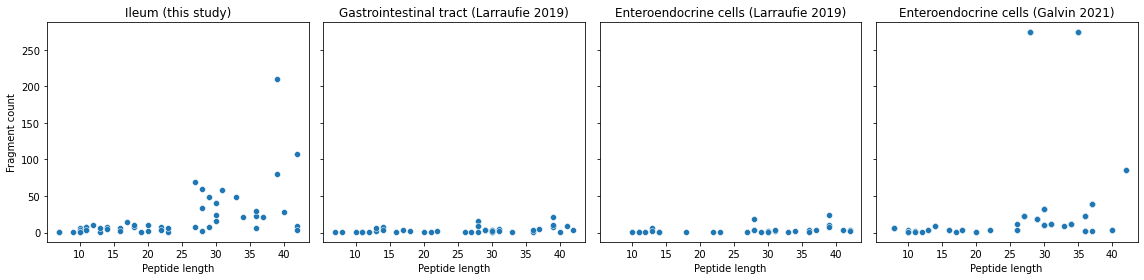

In [12]:
fig, ax = plt.subplots(1,4, figsize=(16,4), sharey=True, sharex=True)

sns.scatterplot(x = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Length'], y = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Fragment count'], ax=ax[0])
sns.scatterplot(data=df_larraufie_gastrointestinal.loc[df_larraufie_gastrointestinal['Known']], x='Length', y='Fragment count', ax= ax[1])
sns.scatterplot(data=df_larraufie_enteroendocrine.loc[df_larraufie_enteroendocrine['Known']], x='Length', y='Fragment count', ax= ax[2])
sns.scatterplot(data=df_galvin_enteroendocrine.loc[df_galvin_enteroendocrine['Known']], x='Length', y='Fragment count', ax= ax[3])

ax[0].set_title('Ileum (this study)')
ax[1].set_title('Gastrointestinal tract (Larraufie 2019)')
ax[2].set_title('Enteroendocrine cells (Larraufie 2019)')
ax[3].set_title('Enteroendocrine cells (Galvin 2021)')

for a in ax:
    a.set_ylabel('Fragment count')
    a.set_xlabel('Peptide length')

plt.tight_layout()

In [18]:
df_ileum['Annotations', 'Fragment count log'] = np.log(df_ileum['Annotations', 'Fragment count'])
df_larraufie_gastrointestinal['Fragment count log'] = np.log(df_larraufie_gastrointestinal['Fragment count'])
df_larraufie_enteroendocrine['Fragment count log'] = np.log(df_larraufie_enteroendocrine['Fragment count'])
df_galvin_enteroendocrine['Fragment count log'] = np.log(df_galvin_enteroendocrine['Fragment count'])

In [20]:
sns.set()

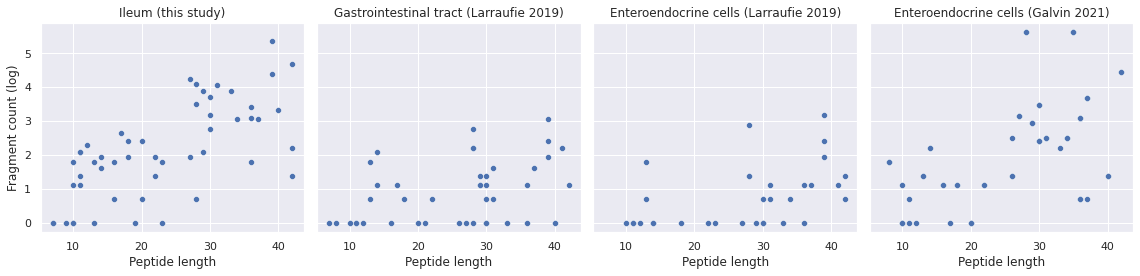

In [22]:
fig, ax = plt.subplots(1,4, figsize=(16,4), sharey=True, sharex=True)

sns.scatterplot(x = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Length'], y = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Fragment count log'], ax=ax[0])
sns.scatterplot(data=df_larraufie_gastrointestinal.loc[df_larraufie_gastrointestinal['Known']], x='Length', y='Fragment count log', ax= ax[1])
sns.scatterplot(data=df_larraufie_enteroendocrine.loc[df_larraufie_enteroendocrine['Known']], x='Length', y='Fragment count log', ax= ax[2])
sns.scatterplot(data=df_galvin_enteroendocrine.loc[df_galvin_enteroendocrine['Known']], x='Length', y='Fragment count log', ax= ax[3])

ax[0].set_title('Ileum (this study)')
ax[1].set_title('Gastrointestinal tract (Larraufie 2019)')
ax[2].set_title('Enteroendocrine cells (Larraufie 2019)')
ax[3].set_title('Enteroendocrine cells (Galvin 2021)')

for a in ax:
    a.set_ylabel('Fragment count (log)')
    a.set_xlabel('Peptide length')

plt.tight_layout()

In [100]:
df.loc[df['Known']].shape

(44, 7)

In [102]:
df_ileum.loc[df_ileum['Annotations','Known']].shape

(51, 38)

## Figure 4c

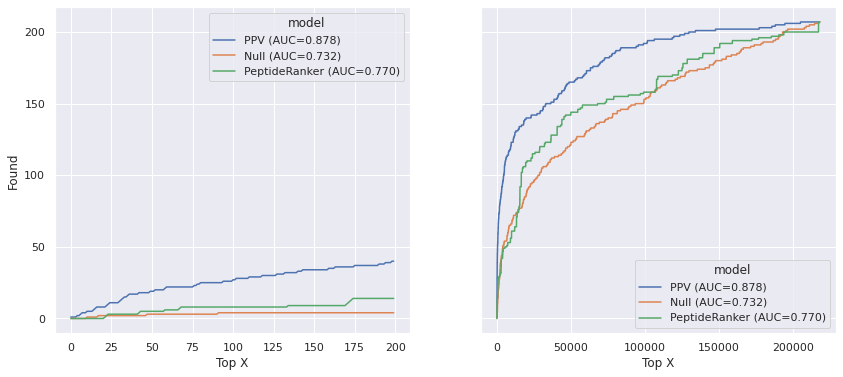

In [7]:
def make_features_numerical(df: pd.DataFrame) -> pd.DataFrame:
    '''Cannot train on boolean values.'''
    df = df.copy()
    for column in df.columns:
        if df[column].dtype == bool:
            df[column] = df[column].astype(int)

    return df

df = pd.read_pickle('mouse_features_paper_with_peptideranker.pickle')
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]

def add_test_probabilities(df, cv_run: str, results_dir: str, folds = [0,1,2,3,4], model_type='sklearn_any'):

    for test in folds:
        # extract the features.
        df_X_orig = df.loc[df[('Annotations', 'Fold')] == test, feature_columns]
        df_X = make_features_numerical(df_X_orig)
        X =  df_X.values

        all_probs = []
        # predict from all the test models and average probabilities.
        for val in folds:
            if val == test:
                continue

            model = pickle.load(open(os.path.join(results_dir, cv_run, f'model_t{test}_v{val}.pkl'), 'rb'))
            
            # TODO adjust for SVM and bayes logreg
            if model_type == 'svc':
                probs = model.decision_function(X)
            elif model_type == 'bayes':
                probs = model.predict(df_X_orig)
            else:
                probs = model.predict_proba(X)[:, 1]
            
            all_probs.append(probs)

        probs = np.stack(all_probs).mean(axis=0)
        df.loc[df[('Annotations', 'Fold')] == test, ('Predictions', cv_run)] = probs


results_dir = 'nested_cv'
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
add_test_probabilities(df, 'cv_f_logreg', results_dir )
#add_test_probabilities(df, 'cv_f_logreg_smote', results_dir )
#add_test_probabilities(df, 'cv_rf', results_dir )
#df[('Predictions', 'rf_old')] = df[('Predictions', 'cv_rf')]
#add_test_probabilities(df, 'cv_svc', results_dir, model_type='svc' )
#add_test_probabilities(df, 'cv_bayes_logreg', results_dir, model_type='bayes')
#feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('Chemical')]
#add_test_probabilities(df, 'cv_chemical', results_dir )

#results_dir = 'bayes_opt'
#feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
#add_test_probabilities(df, 'cv_elasticnet', results_dir )
#add_test_probabilities(df, 'cv_rf', results_dir )

#results_dir = 'feature_selection'
# exclude_features = [
#     ('MS Intensity',    'penalty_start'),
#     ('MS Intensity',     'penalty_stop'),
#     ('MS Frequency',           'ladder'),
#     (    'MS Count',             'stop'),
# ]
# feature_columns = df.columns[ (df.columns.get_level_values(0).str.startswith('MS')) & ~(df.columns.isin(exclude_features))]
# add_test_probabilities(df, 'cv_reduced', results_dir )

import seaborn as sns; sns.set()

def make_plottable(prediction, targets, source, model_name, auc=True):
    plot_data = pd.DataFrame({"prediction": prediction, "Target": targets.astype(int)})
    plot_data = plot_data.sort_values(by="prediction")[::-1]
    plot_data["Top X"] = np.arange(targets.shape[0])
    plot_data["Found"] = plot_data["Target"].cumsum()
    plot_data["source"] = source
    if auc:
        auc = sklearn.metrics.roc_auc_score(targets.astype(int),  prediction)
        model_name = "{} (AUC={:.3f})".format(model_name, auc)
    plot_data["model"] = model_name
    return plot_data

df_plot = pd.concat((
    make_plottable(df[('Predictions', 'cv_f_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PPV"),
    #make_plottable(df[('Predictions', 'cv_bayes_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Bayesian logistic regression"),
    #make_plottable(df[('Predictions', 'cv_rf')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Random forest"),
    make_plottable(df[('Annotations', 'Intensity')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Null"),
    #make_plottable(df[('Predictions', 'cv_svc')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Support vector machine"),
    #make_plottable(df[('Predictions', 'cv_f_logreg_smote')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Logistic regression w/ SMOTE"),
    #make_plottable(df[('Predictions', 'cv_chemical')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Chemical model"),

    #make_plottable(df[('Predictions', 'cv_elasticnet')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Elastic net"),
    #make_plottable(df[('Predictions', 'cv_rf')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Random forest bayes opt"),
    make_plottable(df[('Predictions', 'PeptideRanker')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PeptideRanker"),

    #make_plottable(df[('Predictions', 'cv_reduced')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Feature selected model"),
)).reset_index(drop=True) # need to reset the index for seaborn to work correctly.


fig = plt.figure(figsize=(2 * 7, 6))
ax1, ax2 = fig.subplots(1, 2, sharey=True)
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot[df_plot["Top X"] < 200], ax=ax1)
# sns.lineplot(x="Top X", y="Found", style="model", data=df[df["Top X"] < 1000], ax=ax2)
g = sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot, ax=ax2)
#g.axes.scatter(n_lpv, n_lpv_true, s=50, c='b', marker='x')
#g.axes.annotate('LPV', (n_lpv, n_lpv_true), xycoords='data',
#                xytext=(n_lpv * 1.25, n_lpv_true * 0.75), textcoords='data',
#                arrowprops=dict(arrowstyle= '->', color='k', lw=3.5, ls='--'))
#g.figure.savefig("figures/report/top_panel.pdf")

In [8]:
df = pd.read_pickle('mouse_features_paper_assembly.pickle')
results_dir = 'nested_cv_assembly'
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
add_test_probabilities(df, 'cv_f_logreg', results_dir )
df_plot_assembly = make_plottable(df[('Predictions', 'cv_f_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PPV assembly")

In [9]:
df_plot = pd.concat([df_plot, df_plot_assembly]).reset_index(drop=True)

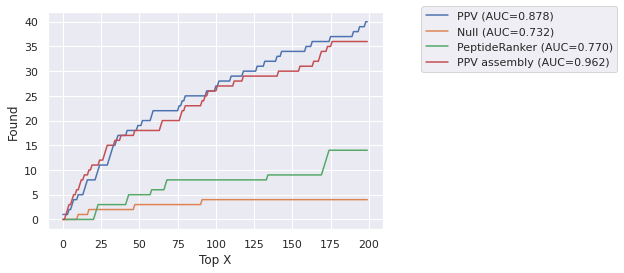

In [10]:
sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot[df_plot["Top X"] < 200])
plt.legend(bbox_to_anchor=(1.1, 1.05))


plt.savefig(f"figures/paper/figure_4c.svg")
plt.savefig(f"figures/paper/figure_4c.pdf")


## Figure 4a

In [13]:
df = pd.read_pickle('mouse_features_paper.pickle')
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
models = []
for t in range(4):
    for v in range(4):
        if not t ==v:
            models.append(pickle.load(open(os.path.join('nested_cv', 'cv_f_logreg', f'model_t{t}_v{v}.pkl'), 'rb')))


coef = [model.named_steps['logreg'].coef_ for model in models]
coef_df = pd.DataFrame(np.concatenate(coef), columns=feature_columns)

coef_raw = [model.named_steps['logreg'].coef_ / np.sqrt(model.named_steps['scaler'].var_) for model in models]
coef_raw_df = pd.DataFrame(np.concatenate(coef_raw), columns=feature_columns)

coef_df.columns = [' '.join(col).strip() for col in coef_df.columns.values]
coef_raw_df.columns= [' '.join(col).strip() for col in coef_raw_df.columns.values]

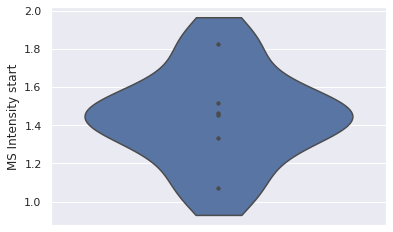

In [17]:
sns.violinplot(y=coef_df['MS Intensity start'], cut=True, inner='point')
plt.savefig(f"figures/paper/figure_4a.svg")
plt.savefig(f"figures/paper/figure_4a.pdf")

## Figure 4b

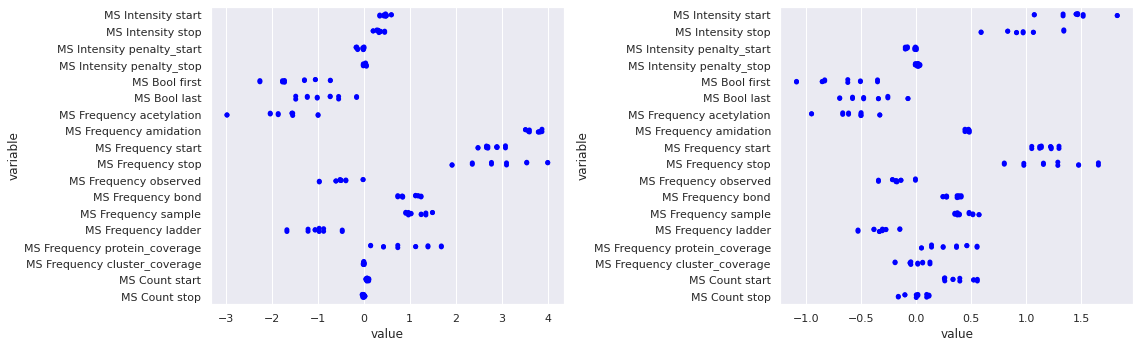

In [18]:
fig, axs = plt.subplots(1,2,figsize=(8*2,5))
sns.stripplot(data=coef_raw_df.melt(), x='value', y='variable',color='blue', ax=axs[0])

sns.stripplot(data=coef_df.melt(), x='value', y='variable',color='blue', ax=axs[1])
fig.tight_layout()
plt.savefig(f"figures/paper/figure_4b.svg")
plt.savefig(f"figures/paper/figure_4b.pdf")

## Figure 5a

In [4]:
obs_data = pd.read_pickle('mouse_features_paper.pickle')
ppv_data = pd.read_pickle('mouse_features_paper_assembly.pickle')
results_dir = 'nested_cv'
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
add_test_probabilities(obs_data, 'cv_f_logreg', results_dir )


<ipython-input-204-c60e58ea1264>:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 5))


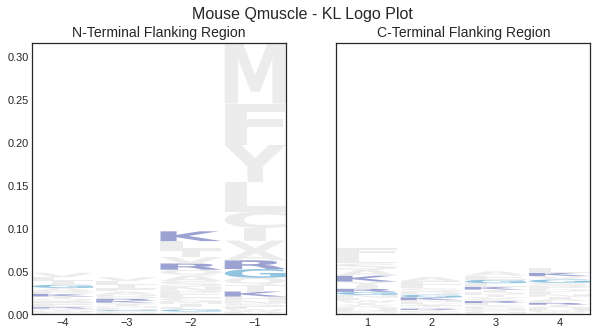

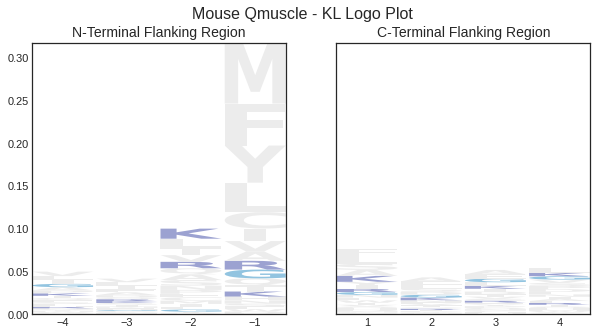

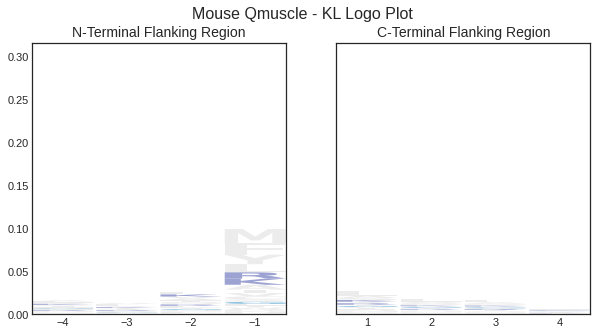

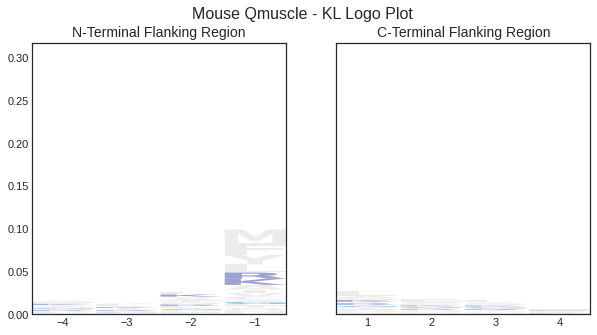

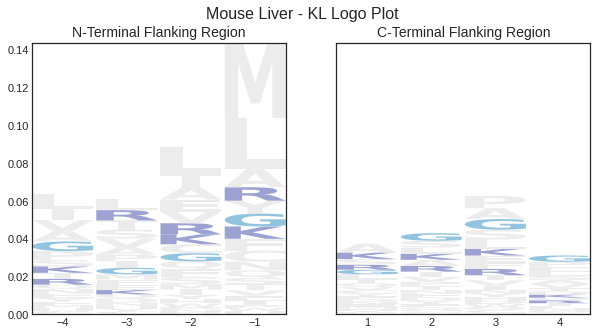

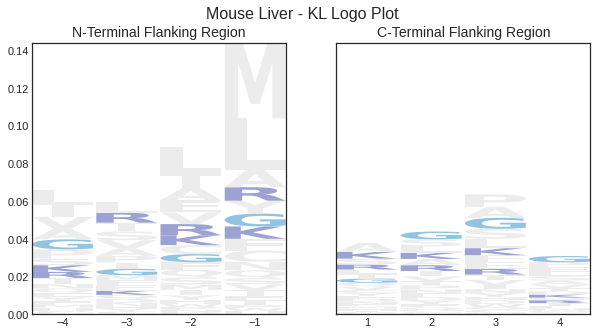

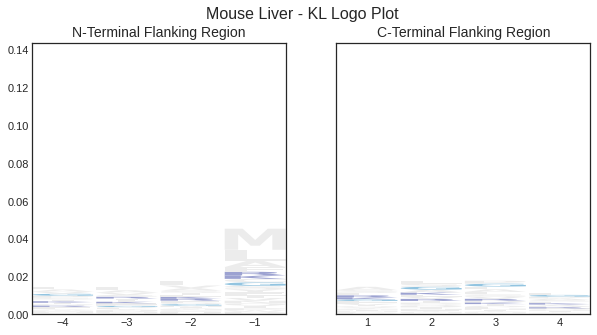

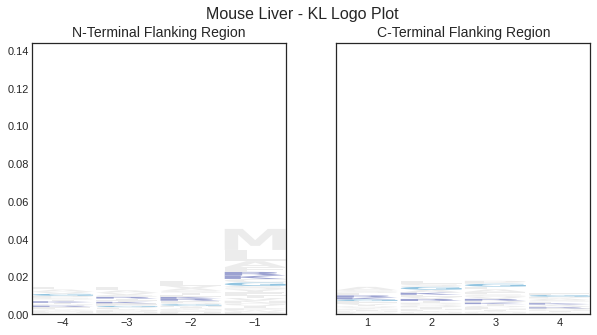

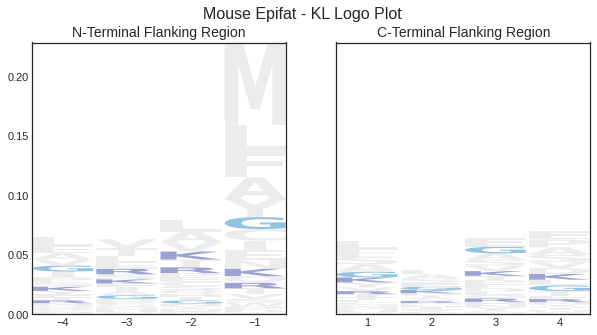

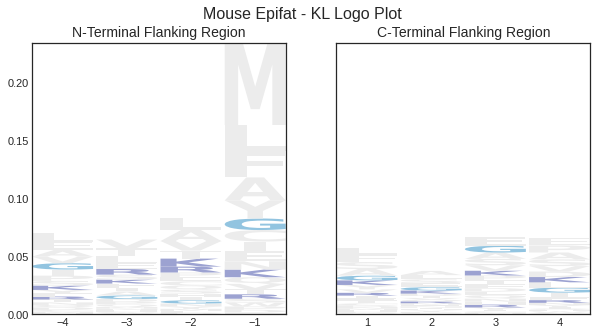

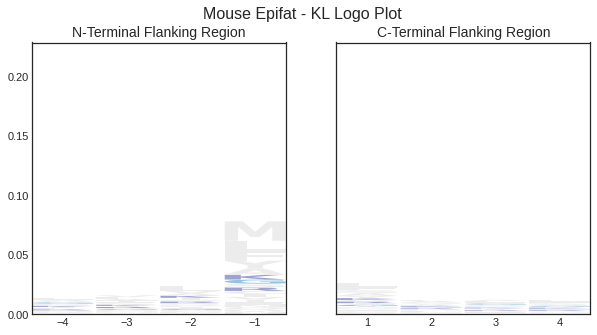

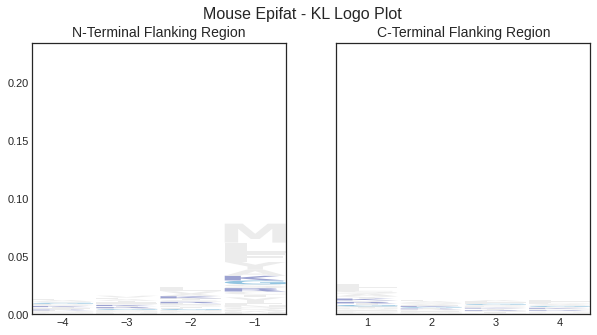

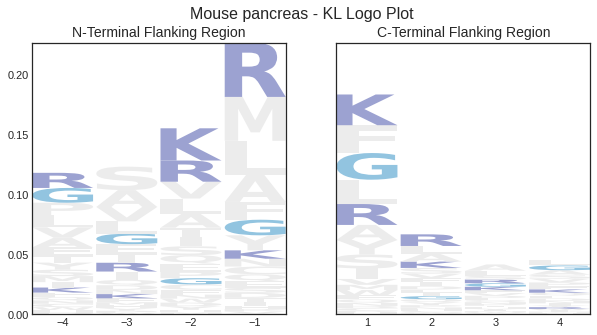

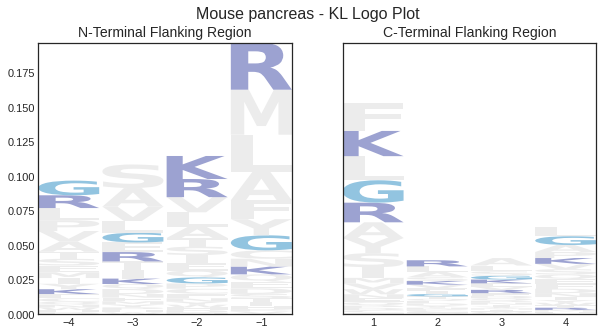

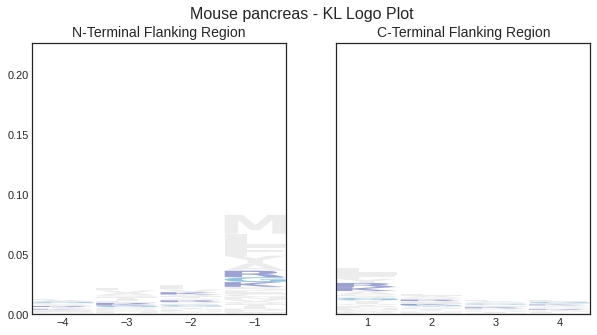

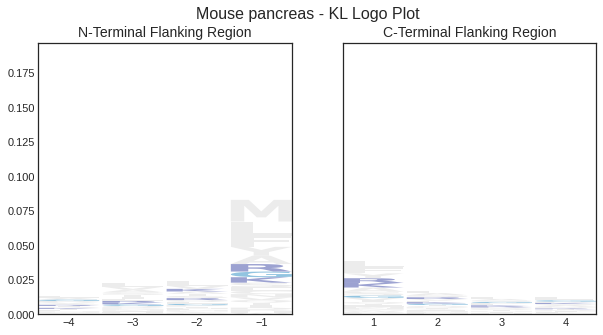

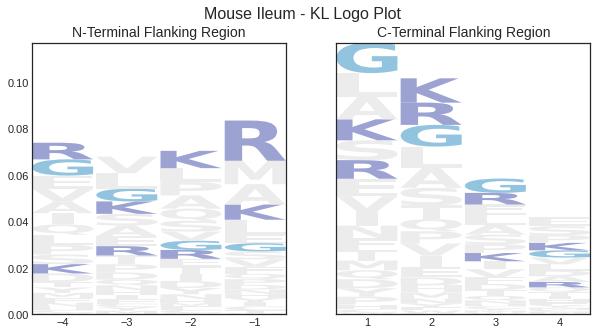

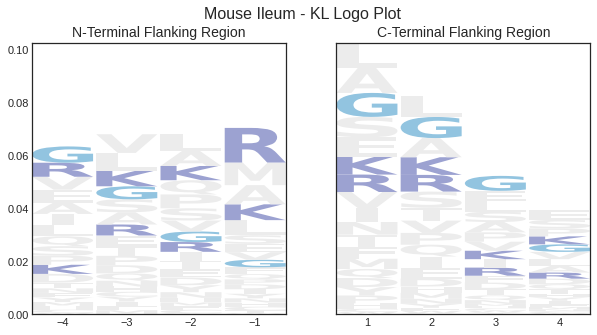

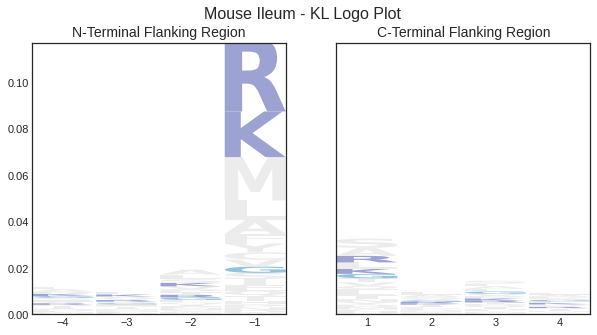

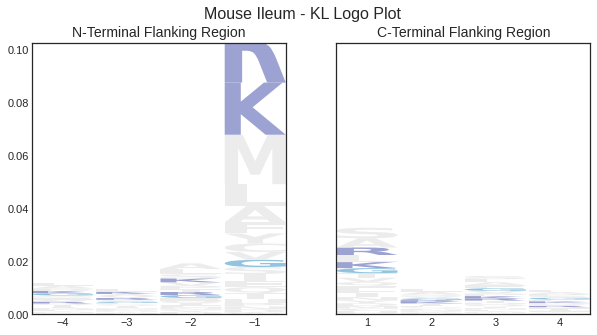

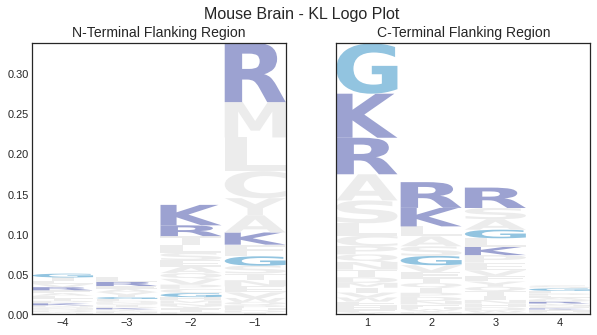

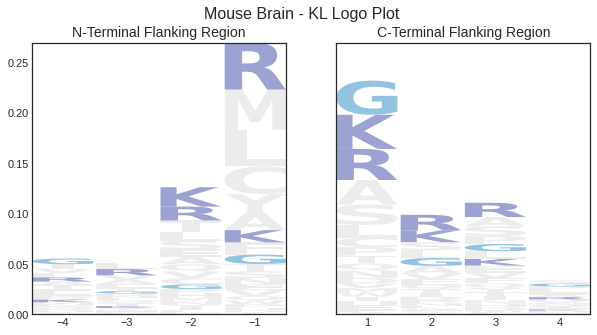

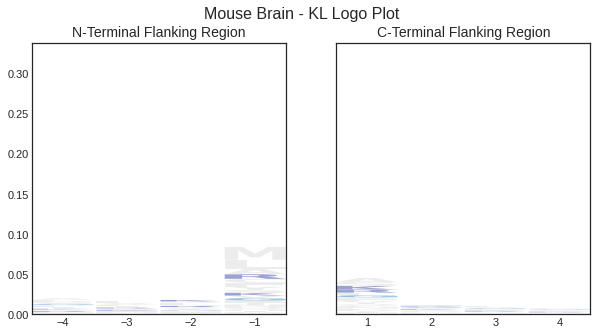

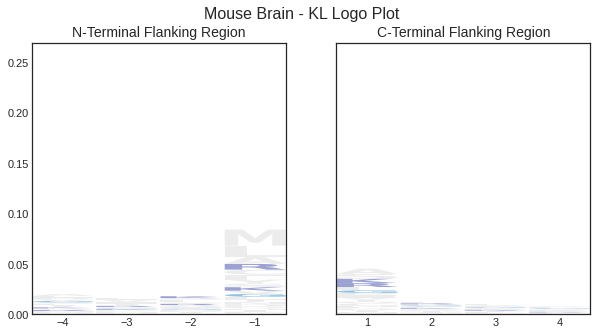

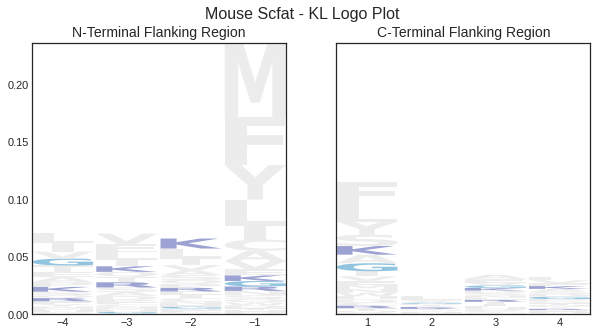

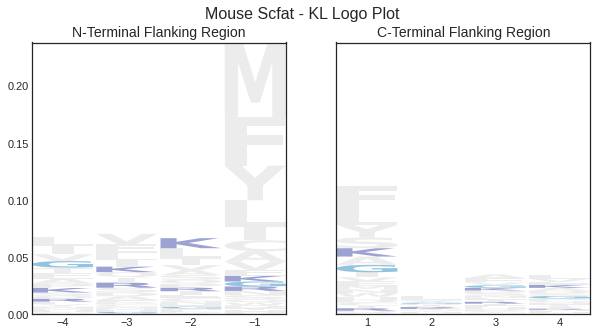

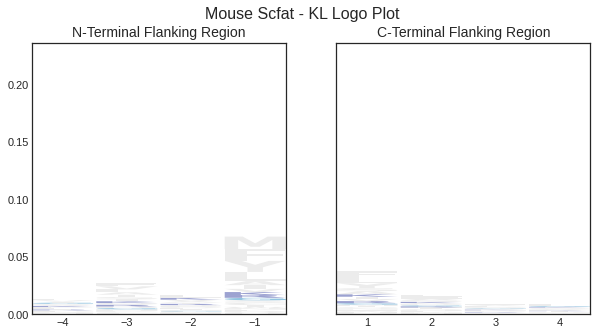

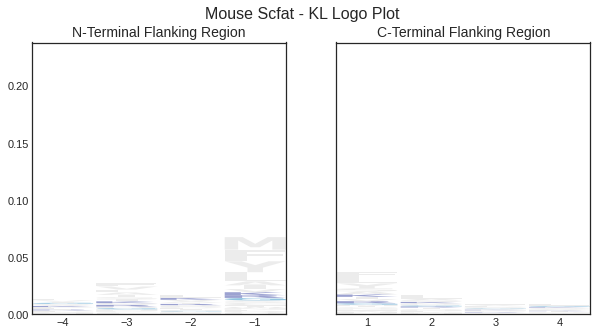

In [204]:
import logomaker

def create_pfm(df, *, by='Counts'):
    annotations = df["Annotations"].copy()
    if by == "Counts":
        annotations[by] = 1
    weights = annotations[by]
    
    aa = list('ACDEFGHIKLMNPQRSTVWY')
    n_counts = pd.DataFrame(np.zeros((4, len(aa))), columns=aa, index=[-4, -3, -2, -1])
    c_counts = pd.DataFrame(np.zeros((4, len(aa))), columns=aa, index=[1, 2, 3, 4])
    _iter = ((n_counts, annotations[by].values, annotations["N Flanking"].values, [-4, -3, -2, -1]),
             (c_counts, annotations[by].values, annotations["C Flanking"].values, [1, 2, 3, 4]))
    for counts, weights, flanking_region, indexer in _iter:
        for w, seq in zip(weights, flanking_region):
            for index, aa in zip(indexer, seq):
                if aa in '_U':
                    continue
                counts.loc[index, aa] += w
    return n_counts, c_counts


def norm(counts, pseudo_count=0.1):
    counts = counts + pseudo_count
    return (counts.T / counts.sum(axis=1)).T


def kl(p, q):
    return (p * np.log2(p / q)).sum(axis=1)


def calc_height(p_count, q_count):
    p = norm(p_count)
    q = norm(q_count)
    I = kl(p, q)
    return (p.T * I).T
    
    
def create_logo_on_axis(height, ax, terminal, max_height, color_scheme=None):
    ax.set_title(f"{terminal}-Terminal Flanking Region", fontsize=14)
    logomaker.Logo(height, font_name='Arial Rounded MT Bold', ax=ax, color_scheme=color_scheme)
    ax.xaxis.grid(False)
    ax.patch.set_visible(False)
    ax.set_ylim(0, max_height)
    
    
def create_logo_plot(n_fg_counts, c_fg_counts, n_bg_counts, c_bg_counts, tissue="Mouse Brain", *, color_scheme=None, max_height=None):
    fig = plt.figure(figsize=(10, 5))
    fig.suptitle(f"{tissue} - KL Logo Plot", fontsize=16)
    axes = fig.subplots(1, 2)
    n_height = calc_height(n_fg_counts, n_bg_counts)
    c_height = calc_height(c_fg_counts, c_bg_counts)
    if max_height is None:
        max_height = max(n_height.sum(axis=1).max(), c_height.sum(axis=1).max())
    axes[1].get_yaxis().set_visible(False)
    create_logo_on_axis(n_height, axes[0], "N", max_height, color_scheme)
    create_logo_on_axis(c_height, axes[1], "C", max_height, color_scheme)
    return fig, max_height

def get_aa_counts(fasta_file, amino_acids):
    amino_acids = set(amino_acids)
    counter = {aa: 0 for aa in amino_acids}
    for line in open(fasta_file):
        if line.startswith('>'):
            continue
        for aa in line.strip():
            if aa in amino_acids:
                counter[aa] += 1
    return counter
#     total = sum(counter.values())
#     return {aa: count / total for (aa, count) in counter.items()}



amino_acids = 'ARNDBCEQZGHILKMFPSTWYV'
color_scheme = {aa: '#ececec' for aa in amino_acids}
color_scheme.update({
    "R": "#9ca2d1",
    "K": "#9ca2d1",
    "G": "#92c4e0"
})
df = obs_data.copy()
df["Annotations", "Prediction"] =  obs_data['Predictions', 'cv_f_logreg']

n_total = 500
for tissue in {i[0] for i in obs_data.index}:
    # PPV
    df_tissue = df.loc[tissue].sort_values(("Annotations", "Prediction"), ascending=False)
    known_tissue = df_tissue["Annotations", "Known"].astype(bool)
    heights = []
    for _df in (df_tissue, df_tissue[~known_tissue]):
        # PPV
        top = _df.head(n_total)
        rest = _df.tail(-n_total)
        n_fg, c_fg = create_pfm(top)
        n_bg, c_bg = create_pfm(rest)
        fig, height = create_logo_plot(n_fg, c_fg, n_bg, c_bg, tissue, color_scheme=color_scheme)
        heights.append(height)
        extra = ''
        if _df is not df_tissue:
            extra = "_without_known"
        fig.savefig(f"figures/paper/figure_3h_and_supplement_ppv_{tissue}{extra}.svg")
        fig.savefig(f"figures/paper/figure_3h_and_supplement_ppv_{tissue}{extra}.pdf")
        
    # LPV
    df_tissue = ppv_data.loc[tissue]
    known_tissue = df_tissue["Annotations", "Known"].astype(bool)
    lpv_selector = df_tissue["Annotations", "LPV"]
    obs_selector = df_tissue["MS Bool", "observed"]
    for max_height, _df in zip(heights, (df_tissue, df_tissue[~known_tissue])):
        # PPV
        lpv = df_tissue[lpv_selector]
        not_lpv = df_tissue[~lpv_selector & obs_selector]
        n_lpv, c_lpv = create_pfm(lpv)
        n_not_lpv, c_not_lpv = create_pfm(not_lpv)
        
        fig, _ = create_logo_plot(n_lpv, c_lpv, n_not_lpv, c_not_lpv, tissue, 
                                  color_scheme=color_scheme, max_height=max_height)
        extra = ''
        if _df is not df_tissue:
            extra = "_without_known"
        fig.savefig(f"figures/paper/figure_3h_and_supplement_lpv_{tissue}{extra}.svg")
        fig.savefig(f"figures/paper/figure_3h_and_supplement_lpv_{tissue}{extra}.pdf")


## Figure 5b

In [29]:
uniprot_secreted = pd.read_csv('https://www.uniprot.org/uniprot/?query=locations:(location:%22Secreted%20[SL-0243]%22)&fil=organism%3A%22Mus+musculus+(Mouse)+[10090]%22&format=tab#', sep='\t')
is_secreted = set(uniprot_secreted["Entry"])
def create_secreted(index):
    secreted = pd.Series(False, index=index, dtype=bool)
    for campaign_id, protein_id, start ,stop in index:
    #for campaign_id, pep_id in index.peptidomics.iter_index():
        _index = campaign_id, protein_id, start, stop
        secreted[_index] = protein_id in is_secreted
    return secreted
    
obs_data["Annotations", "Secreted"] = create_secreted(obs_data.index)

uniprot_proteome = pd.read_csv('https://www.uniprot.org/uniprot/?query=*&fil=reviewed%3Ayes+AND+organism%3A%22Mus+musculus+%28Mouse%29+%5B10090%5D%22+AND+proteome%3Aup000000589&format=tab#', sep='\t')
uniprot_proteome_secreted = pd.read_csv('https://www.uniprot.org/uniprot/?query=reviewed%3Ayes+AND+organism%3A%22Mus+musculus+%28Mouse%29+%5B10090%5D%22+AND+proteome%3Aup000000589+AND+locations%3A%28location%3A%22Secreted+%5BSL-0243%5D%22%29&sort=score&format=tab#', sep='\t')

In [47]:
proteome_secreted = len(uniprot_proteome_secreted)/len(uniprot_proteome) *100
peptidome_secreted = obs_data['Annotations', 'Secreted'].sum() / len(obs_data) *100

sub_df = obs_data.loc[obs_data['Predictions', 'cv_f_logreg']>0.01]
high_secreted = sub_df['Annotations', 'Secreted'].sum() / len(sub_df) *100


sub_df = obs_data.nlargest(200, ('Predictions', 'cv_f_logreg'))
top_secreted = sub_df['Annotations', 'Secreted'].sum() / len(sub_df) *100

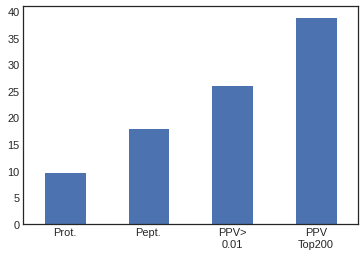

In [55]:
pd.Series({'Prot.': proteome_secreted, 'Pept.': peptidome_secreted, 'PPV>\n0.01': high_secreted, 'PPV\nTop200':top_secreted}).plot(kind='bar', rot=0)

plt.savefig("figures/paper/5b.pdf")
plt.savefig("figures/paper/5b.svg")

## Figure 5c

In [196]:
import matplotlib as mpl
mpl.style.use('default')

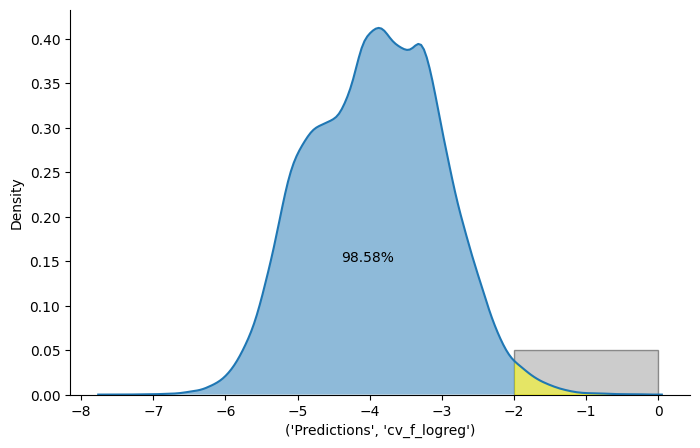

In [190]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
sns.kdeplot(np.log10(obs_data['Predictions', 'cv_f_logreg']), ax=ax)

rec = plt.Rectangle((-2,0),2,0.05, alpha=0.4, facecolor='grey', linewidth=1, edgecolor='black')
ax.add_patch(rec)

below_001 = (obs_data['Predictions', 'cv_f_logreg']<=0.01).sum() /len(obs_data)
ax.text(-4.4, 0.15, f'{below_001:.2%}')
sns.despine()

kde_x = ax.lines[0].get_xdata()
kde_y = ax.lines[0].get_ydata()
plt.fill_between(kde_x[kde_x<=-1.98], kde_y[kde_x<=-1.98], alpha=0.5, label='>0.01')
plt.fill_between(kde_x[kde_x>=-2], kde_y[kde_x>=-2], color='yellow', alpha=0.5, label='>0.01')

plt.savefig("figures/paper/5c.pdf")
plt.savefig("figures/paper/5c.svg")


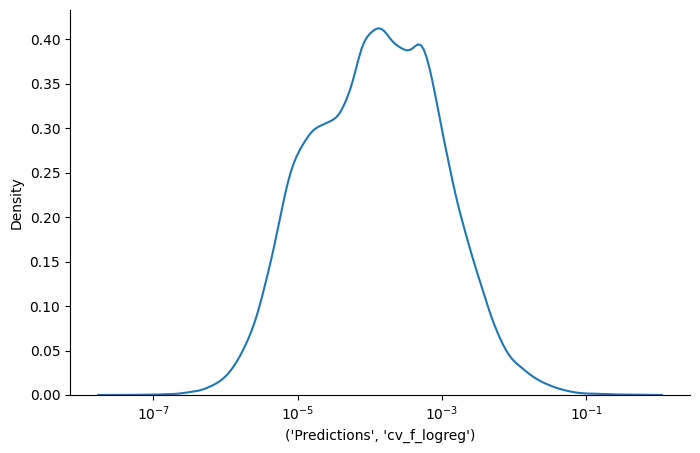

In [191]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
sns.kdeplot(obs_data['Predictions', 'cv_f_logreg'], ax=ax, log_scale=True)

rec = plt.Rectangle((-2,0),2,0.05, alpha=0.4, facecolor='grey', linewidth=1, edgecolor='black')
ax.add_patch(rec)

sns.despine()

In [192]:
print(f"Above 0.01: {(obs_data['Predictions', 'cv_f_logreg']>0.01).sum() /len(obs_data) *100}")
print(f"Above 0.05: {(obs_data['Predictions', 'cv_f_logreg']>0.05).sum() /len(obs_data) *100}")

Above 0.01: 1.4231168139805968
Above 0.05: 0.15557452432744995


In [193]:
kde_x = ax.lines[0].get_xdata()
kde_y = ax.lines[0].get_ydata()

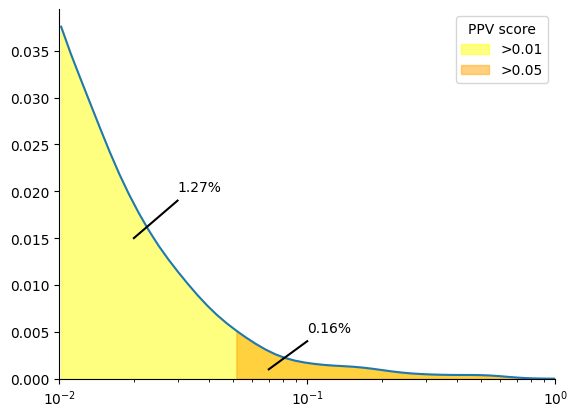

In [195]:
plt.plot(kde_x[kde_x>0.01], kde_y[kde_x>0.01])

thr = 0.05
plt.fill_between(kde_x[kde_x>0.01], kde_y[kde_x>0.01], color='yellow', alpha=0.5, label='>0.01')
plt.fill_between(kde_x[kde_x>thr], kde_y[kde_x>thr], color='orange', alpha=0.5, label='>0.05')
ax = plt.gca()
ax.set_xscale('log')
ax.xaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)
plt.xlim(0.01, 1)
plt.ylim(0,)
sns.despine()
plt.legend(title='PPV score')


perc_001 = f"{((obs_data['Predictions', 'cv_f_logreg']>0.01).sum() - (obs_data['Predictions', 'cv_f_logreg']>0.05).sum()) /len(obs_data):.2%}"
perc_005 = f"{(obs_data['Predictions', 'cv_f_logreg']>0.05).sum() /len(obs_data):.2%}"
ax.text(0.03, 0.02, perc_001)
ax.plot((0.02, 0.03), (0.015, 0.019), 'black', linestyle='-')

ax.text(0.1, 0.005, perc_005)
ax.plot((0.07, 0.1), (0.001, 0.004), 'black', linestyle='-')


plt.savefig("figures/paper/5c_zoom.pdf")
plt.savefig("figures/paper/5c_zoom.svg")

## Figure 7a

In [49]:
results_dir = 'nested_cv'
obs_data = pd.read_pickle('mouse_features_paper_with_peptideranker.pickle')
feature_columns = obs_data.columns[obs_data.columns.get_level_values(0).str.startswith('MS')]
add_test_probabilities(obs_data, 'cv_f_logreg', results_dir )

obs_data['Annotations', 'C Inside'] = obs_data['Annotations', 'Sequence'].apply(lambda x: x[-4:])

In [50]:
import pathlib
import logomaker 

def create_pfm(df, *, by='Counts', n_name="N Flanking", c_name="C Flanking"):
    annotations = df["Annotations"].copy()
    if by == "Counts":
        annotations[by] = 1
    weights = annotations[by]
    
    aa = list('ACDEFGHIKLMNPQRSTVWY')
    n_counts = pd.DataFrame(np.zeros((4, len(aa))), columns=aa, index=[-4, -3, -2, -1])
    c_counts = pd.DataFrame(np.zeros((4, len(aa))), columns=aa, index=[1, 2, 3, 4])
    _iter = ((n_counts, annotations[by].values, annotations[n_name].values, [-4, -3, -2, -1]),
             (c_counts, annotations[by].values, annotations[c_name].values, [1, 2, 3, 4]))
    for counts, weights, flanking_region, indexer in _iter:
        for w, seq in zip(weights, flanking_region):
            for index, aa in zip(indexer, seq):
                if aa in '_U':
                    continue
                counts.loc[index, aa] += w
    return n_counts, c_counts


def norm(counts, pseudo_count=0.1):
    counts = counts + pseudo_count
    return (counts.T / counts.sum(axis=1)).T
    
def kl(p, q):
    return (p * np.log2(p / q)).sum(axis=1)


def calc_kl_height(p_count, q_count):
    p = norm(p_count)
    q = norm(q_count)
    I = kl(p, q)
    return (p.T * I).T


def calc_log_ratio_height(fg_count, bg_count):
    return np.log2(norm(fg_count)) - np.log2(norm(bg_count))
    
    
def calc_diff_height(fg_count, bg_count):
    return norm(fg_count) - norm(bg_count)

def create_logo_on_axis(height, ax, title, ylim=None, color_scheme=None):
#     ax.set_title(f"{terminal}-Terminal Flanking Region", fontsize=14)
    ax.set_title(title, fontsize=14)
    logomaker.Logo(height, font_name='Arial Rounded MT Bold', ax=ax, color_scheme=color_scheme, flip_below=False)
    ax.xaxis.grid(False)
    ax.patch.set_visible(False)
    if ylim is not None:
        ax.set_ylim(*ylim)
    
    
def create_logo_plot(n_fg_counts, c_fg_counts, n_bg_counts, c_bg_counts, tissue="Mouse Brain", *,
                     color_scheme=None, ylim=None, n_title="N-Terminal Flanking Region",
                     c_title="C-Terminal Flanking Region", name="KL", calc_height=calc_kl_height):
                     
    fig = plt.figure(figsize=(10, 5))
    fig.suptitle(f"{tissue} - {name} Logo Plot", fontsize=16)
    axes = fig.subplots(1, 2)
    
    n_height = calc_height(n_fg_counts, n_bg_counts)
    c_height = calc_height(c_fg_counts, c_bg_counts)
    
    if ylim is None:
        ymax = max(c_height[(0 < c_height)].sum(axis=1).max(), n_height[(0 < n_height)].sum(axis=1).max())
        ymin = min(c_height[(c_height < 0)].sum(axis=1).min(), n_height[(n_height < 0)].sum(axis=1).min())
        ylim = (ymin, ymax)
        
    axes[1].get_yaxis().set_visible(False)
    create_logo_on_axis(n_height, axes[0], n_title, ylim, color_scheme)
    create_logo_on_axis(c_height, axes[1], c_title, ylim, color_scheme)
    return fig, ylim

def get_aa_counts(fasta_file, amino_acids):
    amino_acids = set(amino_acids)
    counter = {aa: 0 for aa in amino_acids}
    for line in open(fasta_file):
        if line.startswith('>'):
            continue
        for aa in line.strip():
            if aa in amino_acids:
                counter[aa] += 1
    return counter

amino_acids = 'ARNDBCEQZGHILKMFPSTWYV'
color_scheme = {aa: '#ececec' for aa in amino_acids}
color_scheme.update({
    "R": "#9ca2d1",
    "K": "#9ca2d1",
    "G": "#92c4e0"
})

def _create_figs(fg, bg, tissue, ylims=(None, None), *, n_name="N Flanking", c_name="C Flanking",
                color_scheme=color_scheme):
    n_fg, c_fg = create_pfm(fg, n_name=n_name, c_name=c_name)
    n_bg, c_bg = create_pfm(bg, n_name=n_name, c_name=c_name)
    names = ("KL", "Change in Percent")
    height_functions = [calc_kl_height, lambda p, q: 100 * calc_diff_height(p, q)]
    return list(zip(*[create_logo_plot(n_fg, c_fg, n_bg, c_bg, tissue.title(), calc_height=height_function,
                            name=name, color_scheme=color_scheme, ylim=ylim)
            for name, height_function, ylim in zip(names, height_functions, ylims)]))

def _save(figs, name, tissue, extra='', types=('kl', 'diff')):
    for fig, type_ in zip(figs, types):
        for ext in ('svg', 'pdf'):
            folder = pathlib.Path(f"../figures/logo/{type_}/{ext}")
            folder.mkdir(exist_ok=True, parents=True)
            fig.savefig(folder / f"{name}_{tissue.lower()}{extra}.{ext}")


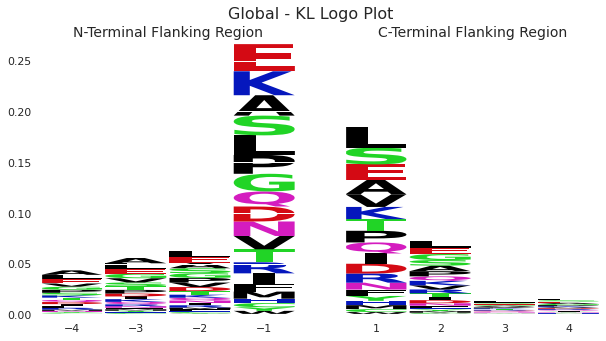

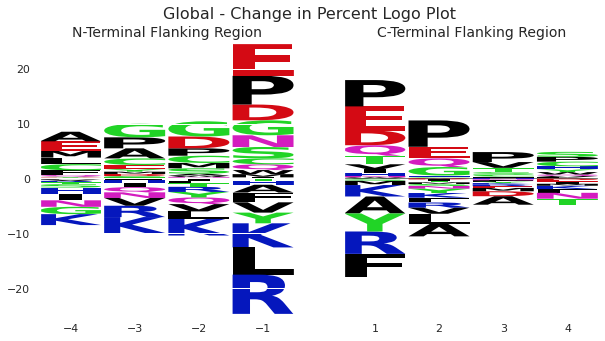

In [51]:
amidation_selector = obs_data["MS Frequency", "amidation"] > 0.75
g_selector = obs_data["Annotations", "C Flanking"].apply(lambda x: x[0] == 'G')
# obs_data.loc[~g_selector & amidation_selector]["Annotations"]


known_selector = obs_data["Annotations", "Known"].astype(bool)
n_total = 100
extra = '_without_known'

df_no_g = obs_data.loc[~g_selector & ~known_selector]
amidation_selector = df_no_g["MS Frequency", "amidation"] > 0.75

# amidated vs not amidated
alt_amidated = df_no_g.loc[amidation_selector]
not_amidated = df_no_g.loc[~amidation_selector]
figs1, _ = _create_figs(alt_amidated, not_amidated, 'global', n_name="C Inside", color_scheme=None)
_save(figs1, 'alt_am_vs_not_am', 'global', extra)

name = 'alt_am_vs_not_am'
for fig, type_ in zip(figs1, ('kl', 'diff')):
    for ext in ('svg', 'pdf'):
        folder = pathlib.Path("figures/paper")
        fig.savefig(folder / f"7a.{ext}")

## Figure 7b

In [52]:
inside = 'EP' # + 'D'
outside = 'PE' # + 'D'

total_am = df_no_g[amidation_selector].shape[0]
total_not_am = df_no_g[~amidation_selector].shape[0]

for _in in inside:
    for _out in outside:
        e_inside_selector = df_no_g["Annotations", "C Inside"].apply(lambda x: x[3] == _in)
        p_outside_selector = df_no_g["Annotations", "C Flanking"].apply(lambda x: x[0] == _out)

        am_io = df_no_g.loc[amidation_selector & e_inside_selector & p_outside_selector].shape[0] / total_am
        am_i = df_no_g.loc[amidation_selector & e_inside_selector].shape[0] / total_am
        am_o = df_no_g.loc[amidation_selector & p_outside_selector].shape[0] / total_am

        not_am_io = df_no_g.loc[~amidation_selector & e_inside_selector & p_outside_selector].shape[0]  / total_not_am
        not_am_i = df_no_g.loc[~amidation_selector & e_inside_selector].shape[0] / total_not_am
        not_am_o = df_no_g.loc[~amidation_selector & p_outside_selector].shape[0]  / total_not_am

        print(f'{_in}|*: am={100 * am_i:4.2f}% bg={100 * not_am_i:4.2f}%, enrichment={am_i / not_am_i:4.2f}')
        print(f'*|{_out}: am={100 * am_o:4.2f}% bg={100 * not_am_o:4.2f}%, enrichment={am_o / not_am_o:4.2f}')
        print(f'{_in}|{_out}: am={100 * am_io:4.2f}% bg={100 * not_am_io:4.2f}%, enrichment={am_io / not_am_io:4.2f}')
        both = am_io / not_am_io
        expected_both = am_i * am_o / (not_am_i * not_am_o)
        print(f'---: expected={expected_both:4.2f} observed={both:4.2f}, extra_enrichment={both / expected_both:4.2f}')
        print()


E|*: am=10.59% bg=4.51%, enrichment=2.35
*|P: am=6.17% bg=1.29%, enrichment=4.77
E|P: am=0.76% bg=0.05%, enrichment=15.21
---: expected=11.20 observed=15.21, extra_enrichment=1.36

E|*: am=10.59% bg=4.51%, enrichment=2.35
*|E: am=8.20% bg=3.50%, enrichment=2.34
E|E: am=1.52% bg=0.37%, enrichment=4.10
---: expected=5.49 observed=4.10, extra_enrichment=0.75

P|*: am=6.93% bg=1.70%, enrichment=4.08
*|P: am=6.17% bg=1.29%, enrichment=4.77
P|P: am=0.62% bg=0.04%, enrichment=14.58
---: expected=19.47 observed=14.58, extra_enrichment=0.75

P|*: am=6.93% bg=1.70%, enrichment=4.08
*|E: am=8.20% bg=3.50%, enrichment=2.34
P|E: am=0.83% bg=0.07%, enrichment=11.92
---: expected=9.55 observed=11.92, extra_enrichment=1.25



In [59]:
outstr = '''
E|*: am=10.59% bg=4.51%, enrichment=2.35
*|P: am=6.17% bg=1.29%, enrichment=4.77
E|P: am=0.76% bg=0.05%, enrichment=15.21
---: expected=11.20 observed=15.21, extra_enrichment=1.36

E|*: am=10.59% bg=4.51%, enrichment=2.35
*|E: am=8.20% bg=3.50%, enrichment=2.34
E|E: am=1.52% bg=0.37%, enrichment=4.10
---: expected=5.49 observed=4.10, extra_enrichment=0.75

P|*: am=6.93% bg=1.70%, enrichment=4.08
*|P: am=6.17% bg=1.29%, enrichment=4.77
P|P: am=0.62% bg=0.04%, enrichment=14.58
---: expected=19.47 observed=14.58, extra_enrichment=0.75

P|*: am=6.93% bg=1.70%, enrichment=4.08
*|E: am=8.20% bg=3.50%, enrichment=2.34
P|E: am=0.83% bg=0.07%, enrichment=11.92
---: expected=9.55 observed=11.92, extra_enrichment=1.25
'''

with open('figures/paper/7b.txt', 'w') as f:
    f.write('Global')
    f.write(outstr)

In [54]:
# inside = 'EP' # + 'D'
# outside = 'PE' # + 'D'
inside = 'EP' # + 'D'
outside = 'EP' # + 'D'

# total_am = df_no_g[amidation_selector].shape[0]
high_scoring = 0.01 < df_no_g["Predictions", "cv_f_logreg"] 
total_am = df_no_g[amidation_selector & high_scoring].shape[0]

total_not_am = df_no_g[~amidation_selector].shape[0]

for _in in inside:
    for _out in outside:
        e_inside_selector = df_no_g["Annotations", "C Inside"].apply(lambda x: x[3] == _in)
        p_outside_selector = df_no_g["Annotations", "C Flanking"].apply(lambda x: x[0] == _out)

#         am_io = df_no_g.loc[amidation_selector & e_inside_selector & p_outside_selector].shape[0] / total_am
#         am_i = df_no_g.loc[amidation_selector & e_inside_selector].shape[0] / total_am
#         am_o = df_no_g.loc[amidation_selector & p_outside_selector].shape[0] / total_am
        am_io = df_no_g.loc[high_scoring & amidation_selector & e_inside_selector & p_outside_selector].shape[0] / total_am
        am_i = df_no_g.loc[high_scoring & amidation_selector & e_inside_selector].shape[0] / total_am
        am_o = df_no_g.loc[high_scoring & amidation_selector & p_outside_selector].shape[0] / total_am

        not_am_io = df_no_g.loc[~amidation_selector & e_inside_selector & p_outside_selector].shape[0]  / total_not_am
        not_am_i = df_no_g.loc[~amidation_selector & e_inside_selector].shape[0] / total_not_am
        not_am_o = df_no_g.loc[~amidation_selector & p_outside_selector].shape[0]  / total_not_am

        print(f'{_in}|*: am={100 * am_i:4.2f}% bg={100 * not_am_i:4.2f}%, enrichment={am_i / not_am_i:4.2f}')
        print(f'*|{_out}: am={100 * am_o:4.2f}% bg={100 * not_am_o:4.2f}%, enrichment={am_o / not_am_o:4.2f}')
        print(f'{_in}|{_out}: am={100 * am_io:4.2f}% bg={100 * not_am_io:4.2f}%, enrichment={am_io / not_am_io:4.2f}')
        both = am_io / not_am_io
        expected_both = am_i * am_o / (not_am_i * not_am_o)
        print(f'---: expected={expected_both:4.2f} observed={both:4.2f}, extra_enrichment={both / expected_both:4.2f}')
        print()



E|*: am=12.22% bg=4.51%, enrichment=2.71
*|E: am=8.20% bg=3.50%, enrichment=2.34
E|E: am=0.80% bg=0.37%, enrichment=2.16
---: expected=6.34 observed=2.16, extra_enrichment=0.34

E|*: am=12.22% bg=4.51%, enrichment=2.71
*|P: am=3.70% bg=1.29%, enrichment=2.86
E|P: am=0.32% bg=0.05%, enrichment=6.42
---: expected=7.75 observed=6.42, extra_enrichment=0.83

P|*: am=6.43% bg=1.70%, enrichment=3.79
*|E: am=8.20% bg=3.50%, enrichment=2.34
P|E: am=0.32% bg=0.07%, enrichment=4.59
---: expected=8.87 observed=4.59, extra_enrichment=0.52

P|*: am=6.43% bg=1.70%, enrichment=3.79
*|P: am=3.70% bg=1.29%, enrichment=2.86
P|P: am=0.16% bg=0.04%, enrichment=3.80
---: expected=10.84 observed=3.80, extra_enrichment=0.35



In [60]:
outstr = '''
E|*: am=12.22% bg=4.51%, enrichment=2.71
*|E: am=8.20% bg=3.50%, enrichment=2.34
E|E: am=0.80% bg=0.37%, enrichment=2.16
---: expected=6.34 observed=2.16, extra_enrichment=0.34

E|*: am=12.22% bg=4.51%, enrichment=2.71
*|P: am=3.70% bg=1.29%, enrichment=2.86
E|P: am=0.32% bg=0.05%, enrichment=6.42
---: expected=7.75 observed=6.42, extra_enrichment=0.83

P|*: am=6.43% bg=1.70%, enrichment=3.79
*|E: am=8.20% bg=3.50%, enrichment=2.34
P|E: am=0.32% bg=0.07%, enrichment=4.59
---: expected=8.87 observed=4.59, extra_enrichment=0.52

P|*: am=6.43% bg=1.70%, enrichment=3.79
*|P: am=3.70% bg=1.29%, enrichment=2.86
P|P: am=0.16% bg=0.04%, enrichment=3.80
---: expected=10.84 observed=3.80, extra_enrichment=0.35
'''


with open('figures/paper/7b.txt', 'a') as f:
    f.write('Top')
    f.write(outstr)

## Figure PPV vs. PeptideRanker

In [41]:
obs_data

MS Intensity                          \
                                         start      stop penalty_start   
campaign_id protein_id start stop                                        
Mouse Brain A2A5R2     547   555      3.810477  3.810477      0.000000   
            A0A0N4SVF0 2     50       5.678206  5.678206      0.000000   
            A0A0J9YUE9 810   823      6.081305  6.081305      0.000000   
                       827   835      5.090792  5.090792      0.000000   
            A0A140LJ69 1391  1410     5.417526  5.417526      0.000000   
...                                        ...       ...           ...   
Mouse Scfat P07724     594   606      0.013547  0.105622      0.001883   
                             608      0.013547  8.779323      0.001883   
                       595   602      0.000012  0.250299      0.001871   
                             603      0.000012  0.459729      0.001871   
                       599   608      0.001871  8.779323      0.000000   

                                               MS Bool        MS Frequency  \
                                  penalty_stop   first   last  acetylation   
campaign_id protein_id start stop                                            
Mouse Brain A2A5R2     547   555      0.000000    True   True          0.0   
            A0A0N4SVF0 2     50       0.000000    True   True          1.0   
            A0A0J9YUE9 810   823      0.000000    True   True          0.0   
                       827   835      0.000000    True   True          0.0   
            A0A140LJ69 1391  1410     0.000000    True   True          0.0   
...                                        ...     ...    ...          ...   
Mouse Scfat P07724     594   606      0.721343   False  False          0.0   
                             608      0.829155   False   True          0.0   
                       595   602      0.010369   False  False          0.0   
                             603      0.260668   False  False          0.0   
                       599   608      0.829155   False   True          0.0   

                                                                 ...  \
                                  amidation     start      stop  ...   
campaign_id protein_id start stop                                ...   
Mouse Brain A2A5R2     547   555   1.000000  1.000000  1.000000  ...   
            A0A0N4SVF0 2     50    1.000000  1.000000  1.000000  ...   
            A0A0J9YUE9 810   823   0.000000  1.000000  1.000000  ...   
                       827   835   0.000000  1.000000  1.000000  ...   
            A0A140LJ69 1391  1410  0.000000  1.000000  1.000000  ...   
...                                     ...       ...       ...  ...   
Mouse Scfat P07724     594   606   0.000000  0.030713  0.215888  ...   
                             608   0.000000  0.030713  1.000000  ...   
                       595   602   0.000002  0.000028  0.438045  ...   
                             603   0.000002  0.000028  0.653047  ...   
                       599   608   0.000000  0.004298  1.000000  ...   

                                  Annotations                        \
                                        Known Cluster     Intensity   
campaign_id protein_id start stop                                     
Mouse Brain A2A5R2     547   555        False       1  3.102063e+05   
            A0A0N4SVF0 2     50         False       1  2.287947e+07   
            A0A0J9YUE9 810   823        False       1  5.788228e+07   
                       827   835        False       2  5.916028e+06   
            A0A140LJ69 1391  1410       False       1  1.255351e+07   
...                                       ...     ...           ...   
Mouse Scfat P07724     594   606        False       1  5.338718e+07   
                             608        False       1  1.948926e+08   
                       595   602        False       1  4.828355e+06   
                             603        Fal

In [201]:
results_dir = 'nested_cv'
df = pd.read_pickle('mouse_features_paper_with_peptideranker.pickle')
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
add_test_probabilities(df, 'cv_f_logreg', results_dir )

In [205]:
df

MS Intensity                          \
                                         start      stop penalty_start   
campaign_id protein_id start stop                                        
Mouse Brain A2A5R2     547   555      3.810477  3.810477      0.000000   
            A0A0N4SVF0 2     50       5.678206  5.678206      0.000000   
            A0A0J9YUE9 810   823      6.081305  6.081305      0.000000   
                       827   835      5.090792  5.090792      0.000000   
            A0A140LJ69 1391  1410     5.417526  5.417526      0.000000   
...                                        ...       ...           ...   
Mouse Scfat P07724     594   606      0.013547  0.105622      0.001883   
                             608      0.013547  8.779323      0.001883   
                       595   602      0.000012  0.250299      0.001871   
                             603      0.000012  0.459729      0.001871   
                       599   608      0.001871  8.779323      0.000000   

                                               MS Bool        MS Frequency  \
                                  penalty_stop   first   last  acetylation   
campaign_id protein_id start stop                                            
Mouse Brain A2A5R2     547   555      0.000000    True   True          0.0   
            A0A0N4SVF0 2     50       0.000000    True   True          1.0   
            A0A0J9YUE9 810   823      0.000000    True   True          0.0   
                       827   835      0.000000    True   True          0.0   
            A0A140LJ69 1391  1410     0.000000    True   True          0.0   
...                                        ...     ...    ...          ...   
Mouse Scfat P07724     594   606      0.721343   False  False          0.0   
                             608      0.829155   False   True          0.0   
                       595   602      0.010369   False  False          0.0   
                             603      0.260668   False  False          0.0   
                       599   608      0.829155   False   True          0.0   

                                                                 ...  \
                                  amidation     start      stop  ...   
campaign_id protein_id start stop                                ...   
Mouse Brain A2A5R2     547   555   1.000000  1.000000  1.000000  ...   
            A0A0N4SVF0 2     50    1.000000  1.000000  1.000000  ...   
            A0A0J9YUE9 810   823   0.000000  1.000000  1.000000  ...   
                       827   835   0.000000  1.000000  1.000000  ...   
            A0A140LJ69 1391  1410  0.000000  1.000000  1.000000  ...   
...                                     ...       ...       ...  ...   
Mouse Scfat P07724     594   606   0.000000  0.030713  0.215888  ...   
                             608   0.000000  0.030713  1.000000  ...   
                       595   602   0.000002  0.000028  0.438045  ...   
                             603   0.000002  0.000028  0.653047  ...   
                       599   608   0.000000  0.004298  1.000000  ...   

                                  Annotations                        \
                                        Known Cluster     Intensity   
campaign_id protein_id start stop                                     
Mouse Brain A2A5R2     547   555        False       1  3.102063e+05   
            A0A0N4SVF0 2     50         False       1  2.287947e+07   
            A0A0J9YUE9 810   823        False       1  5.788228e+07   
                       827   835        False       2  5.916028e+06   
            A0A140LJ69 1391  1410       False       1  1.255351e+07   
...                                       ...     ...           ...   
Mouse Scfat P07724     594   606        False       1  5.338718e+07   
                             608        False       1  1.948926e+08   
                       595   602        False       1  4.828355e+06   
                             603        Fal

SpearmanrResult(correlation=0.189594749633112, pvalue=0.0062165203606037766)

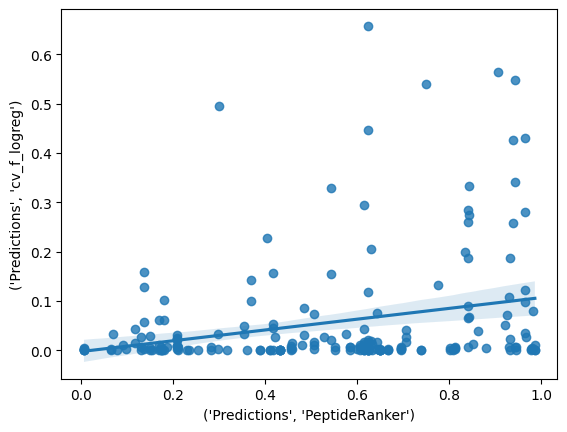

In [215]:
from scipy.stats import spearmanr

data = df.loc[df['Annotations', 'Known']]
x = data[('Predictions', 'PeptideRanker')]
y = data[('Predictions', 'cv_f_logreg')]
sns.regplot(x=x, y =y)
spearmanr(x,y)


In [221]:
df_combo = df.groupby(['protein_id', 'start', 'stop']).mean()

In [234]:
df_combo.shape

(150150, 33)

In [233]:
df[('Annotations','Sequence')].unique().shape

(143958,)

SpearmanrResult(correlation=0.012295284150036341, pvalue=9.488951432033291e-09)

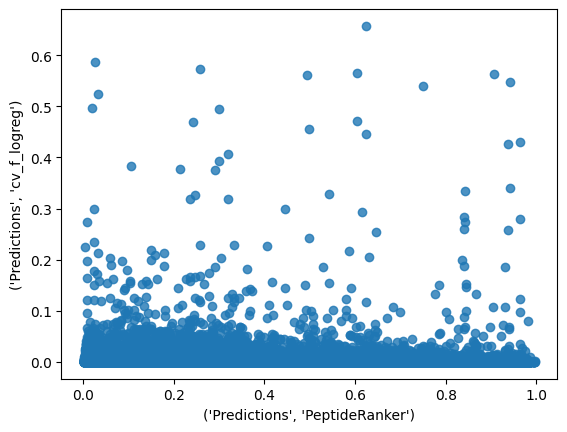

In [216]:
data = df
x = data[('Predictions', 'PeptideRanker')]
y = data[('Predictions', 'cv_f_logreg')]
sns.regplot(x=x, y =y)
spearmanr(x,y)